我用一个具体的二维数据集，通过可视化和计算展示核函数如何工作。


## 1. 原始数据：线性不可分

假设我们有一个二维数据集，包含两类点：

* 红色点：类别 +1，分布在以原点为圆心、半径 1 的圆内。
* 蓝色点：类别 -1，分布在半径 1 到 2 的圆环内。

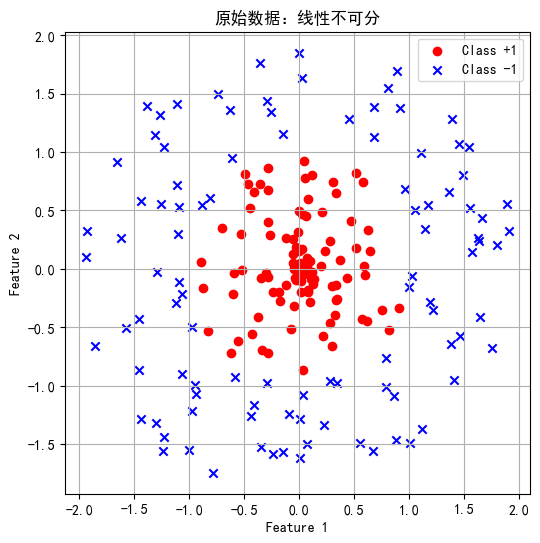

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# 添加以下代码设置中文字体
plt.rcParams["font.family"] = ["SimHei"]  # 支持中文的字体列表
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# 生成数据
np.random.seed(42)
n_samples = 100

# 红色点（内圈）
red_r = np.random.uniform(0, 1, n_samples)
red_theta = np.random.uniform(0, 2*np.pi, n_samples)
red_x = red_r * np.cos(red_theta)
red_y = red_r * np.sin(red_theta)

# 蓝色点（外圈）
blue_r = np.random.uniform(1, 2, n_samples)
blue_theta = np.random.uniform(0, 2*np.pi, n_samples)
blue_x = blue_r * np.cos(blue_theta)
blue_y = blue_r * np.sin(blue_theta)

# 可视化
plt.figure(figsize=(6, 6))
plt.scatter(red_x, red_y, c='red', marker='o', label='Class +1')
plt.scatter(blue_x, blue_y, c='blue', marker='x', label='Class -1')
plt.title('原始数据：线性不可分')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

## 2. 多项式核：显式映射到三维空间

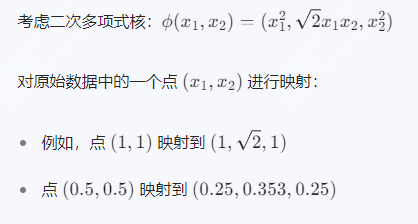


原始点 (1, 1) 映射到 [1.         1.41421356 1.        ]
原始点 (0.5, 0.5) 映射到 [0.25       0.35355339 0.25      ]
原始点 (1.5, 1.5) 映射到 [2.25       3.18198052 2.25      ]


D:\PySpace\PythonMachineLearn\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)
D:\PySpace\PythonMachineLearn\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)
D:\PySpace\PythonMachineLearn\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


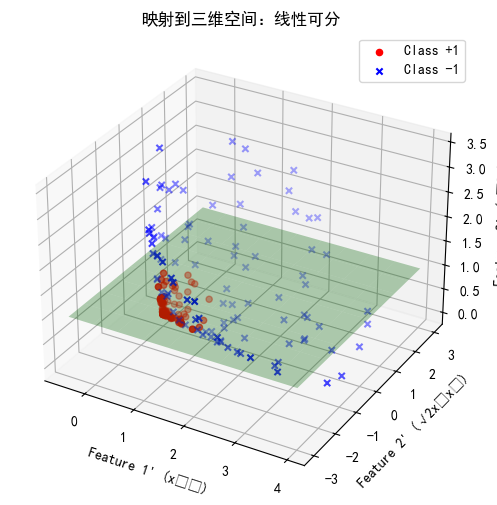

In [3]:
# 定义映射函数
def phi(x1, x2):
    return np.array([x1**2, np.sqrt(2)*x1*x2, x2**2])

# 映射几个示例点
points = [(1, 1), (0.5, 0.5), (1.5, 1.5)]
for p in points:
    print(f"原始点 {p} 映射到 {phi(p[0], p[1])}")

# 可视化映射后的空间（三维）
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 映射红色点
red_X = np.array([phi(x, y) for x, y in zip(red_x, red_y)])
ax.scatter(red_X[:, 0], red_X[:, 1], red_X[:, 2], c='red', marker='o', label='Class +1')

# 映射蓝色点
blue_X = np.array([phi(x, y) for x, y in zip(blue_x, blue_y)])
ax.scatter(blue_X[:, 0], blue_X[:, 1], blue_X[:, 2], c='blue', marker='x', label='Class -1')

# 添加分离平面（z = 1）
xx, yy = np.meshgrid(np.linspace(-0.5, 4, 10), np.linspace(-3, 3, 10))
zz = np.ones_like(xx)
ax.plot_surface(xx, yy, zz, alpha=0.3, color='g')

ax.set_title('映射到三维空间：线性可分')
ax.set_xlabel('Feature 1\' (x₁²)')
ax.set_ylabel('Feature 2\' (√2x₁x₂)')
ax.set_zlabel('Feature 3\' (x₂²)')
plt.legend()
plt.show()